# Visualisation of Audio

In [ ]:
!pip install pydub
!pip install ffmpeg

  Preparing metadata (setup.py) ... done
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6083 sha256=fe91fe193dc6937f9a92445543fca72f63c75c2ac7246994bc6907924044e874
  Stored in directory: /root/.cache/pip/wheels/8e/7a/69/cd6aeb83b126a7f04cbe7c9d929028dc52a6e7d525ff56003a
Successfully built ffmpeg


In [ ]:
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode

RECORD = """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

def record(sec=3):
  print('recording...')
  display(Javascript(RECORD))
  s = output.eval_js('record(%d)' % (sec*1000))
  b = b64decode(s.split(',')[1])
  with open('audio.wav','wb') as f:
    f.write(b)
  return 'audio.wav'

In [ ]:
record()

recording...


<IPython.core.display.Javascript object>

'audio.wav'

### Playing Audio

In [ ]:
# Loading the audio

import librosa

audio_path = '/content/audio.wav'

audio, sr = librosa.load(audio_path)

<ipython-input-6-1704909fd44c>:7: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(audio_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import IPython.display as ipd
ipd.Audio(audio_path)

### Plotting the Waveform

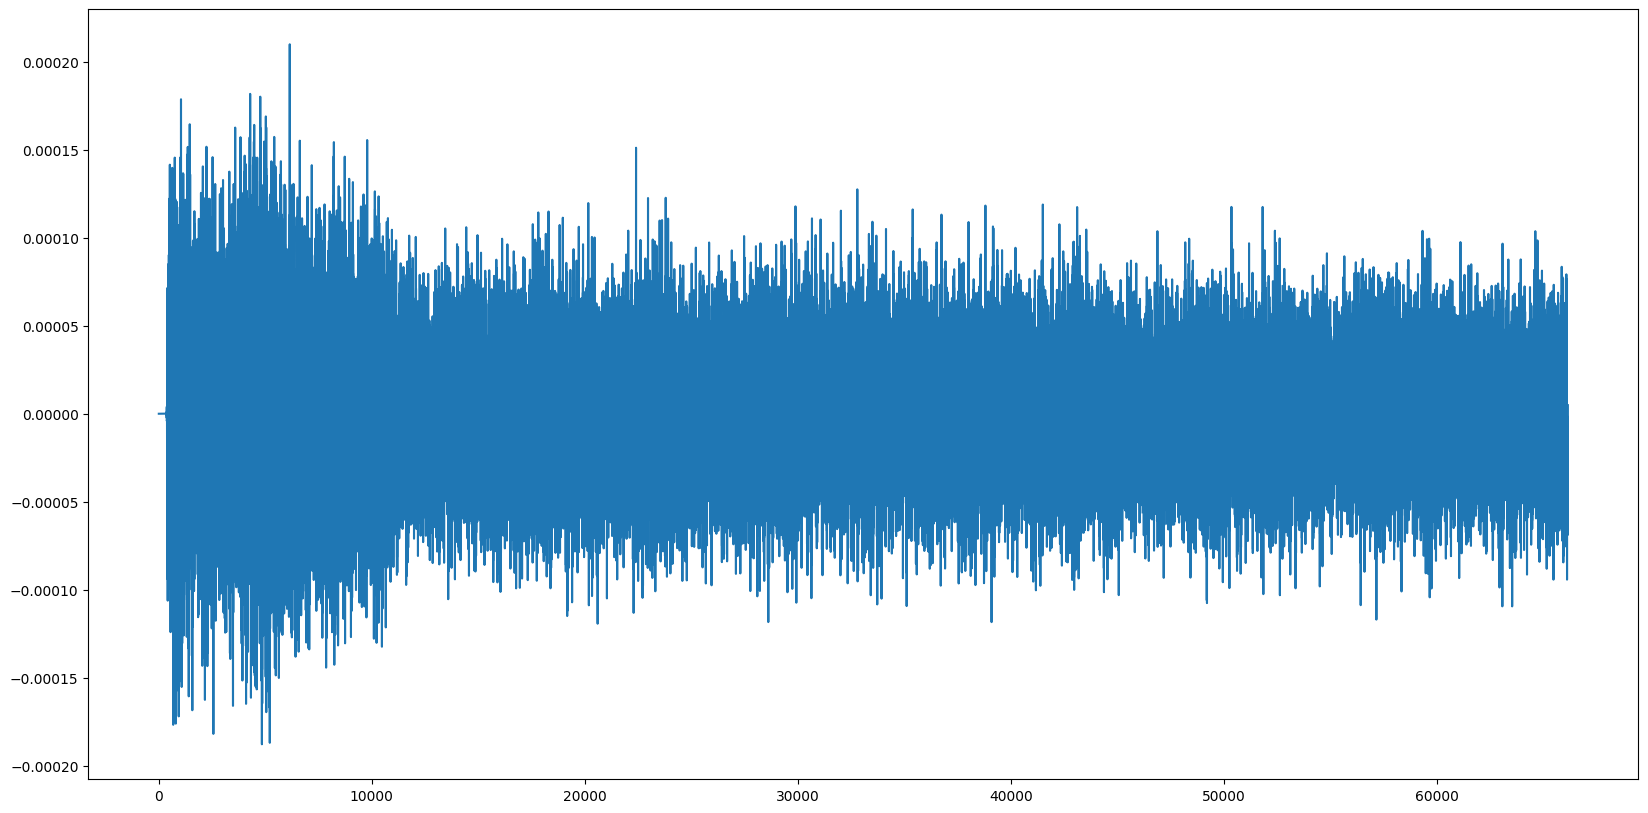

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

plt.figure(figsize=(20,10))
plt.plot(audio)
plt.show()

### Loading the Audio file

In [ ]:
# Loading the audio file
audio_path = "/content/drive/MyDrive/Colab Notebooks/ravdess/train/Actor_07/03-01-02-01-02-02-07.wav"

y, sr = librosa.load(audio_path)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import IPython.display as ipd
ipd.Audio(audio_path)

### Waveform of the Audio

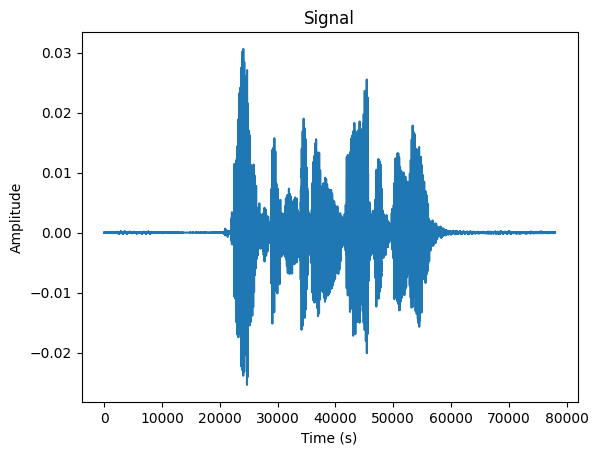

In [ ]:
plt.plot(y)
plt.title("Signal")
plt.ylabel("Amplitude")
plt.xlabel("Time (s)")
plt.show()

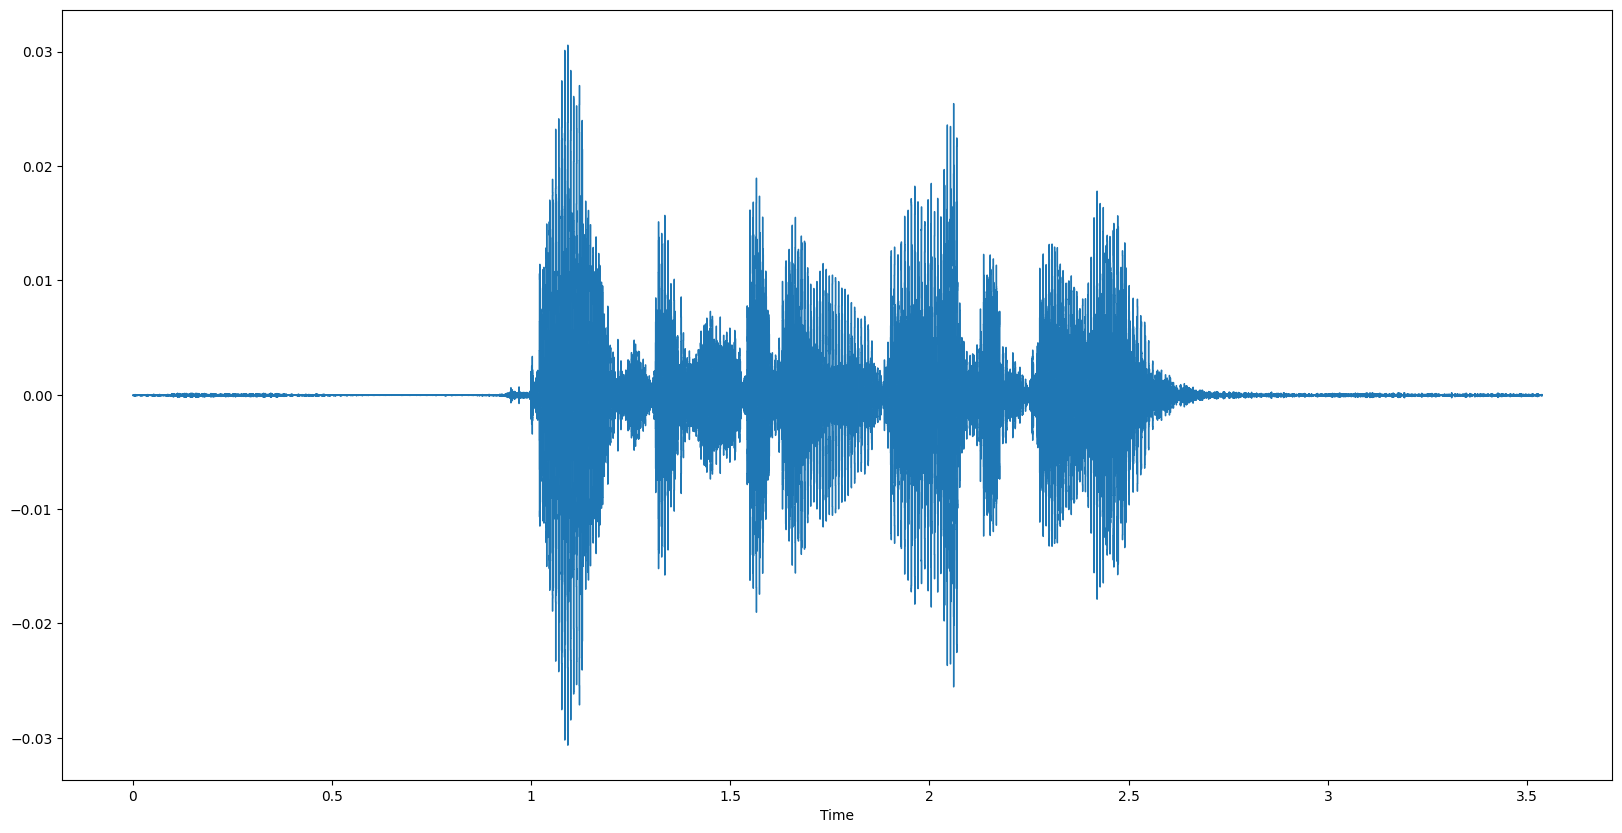

In [ ]:
%matplotlib inline

plt.figure(figsize=(20,10))
librosa.display.waveshow(y, sr=sr)
plt.show()

### Spectrogram of the Audio

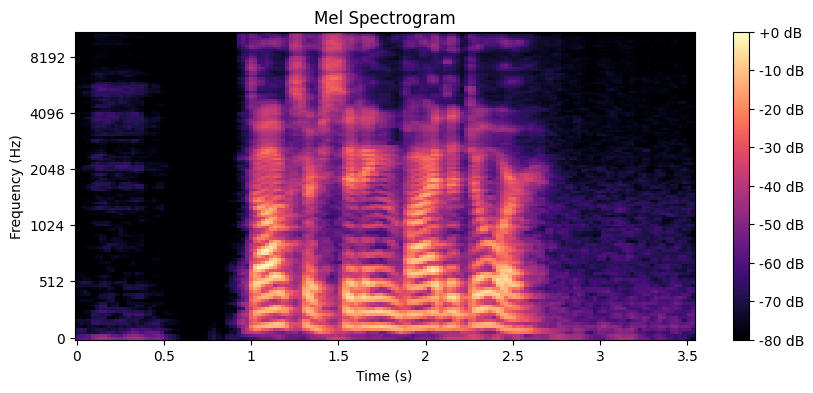

In [ ]:
import numpy as np

# Generate the spectrogram
spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
log_spectrogram = librosa.power_to_db(spectrogram, ref=np.max)

# Plot the spectrogram
plt.figure(figsize=(10,4))
librosa.display.specshow(log_spectrogram, sr=sr, x_axis='time', y_axis='mel')

# Add a color bar and labels
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()

### Chroma Feature Visualization

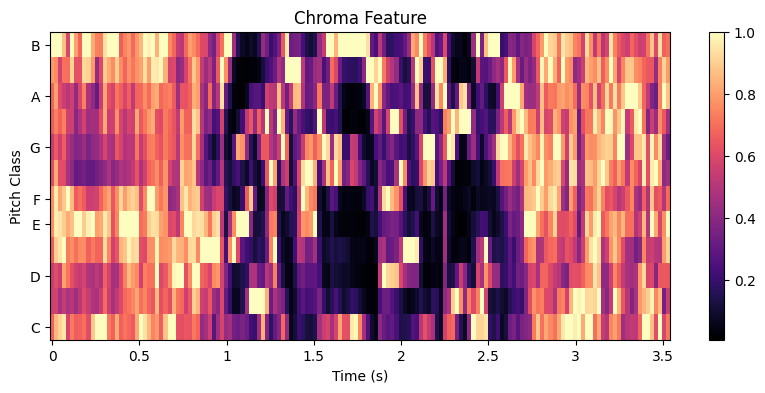

In [ ]:
# Compute the chroma feature
chroma = librosa.feature.chroma_stft(y=y, sr=sr)

# Plot the chroma feature
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma,
                         y_axis='chroma',
                         x_axis='time',
                         sr=sr)

# Add a colorbar and labels
plt.colorbar()
plt.title('Chroma Feature')
plt.xlabel('Time (s)')
plt.ylabel('Pitch Class')
plt.show()

### MFCC (Mel-Frequency Cepstral Coefficients)

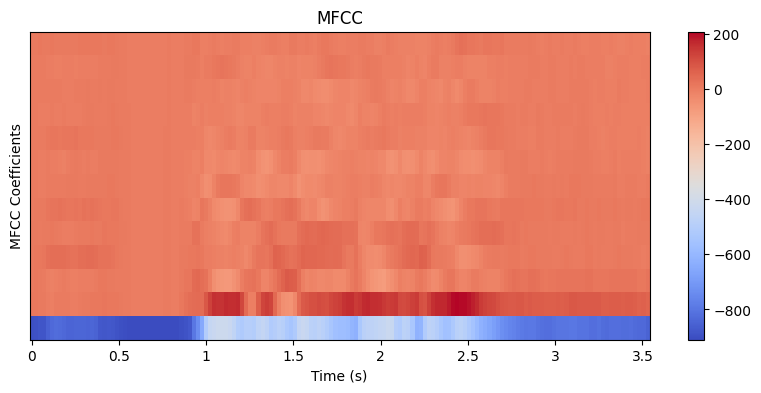

In [ ]:
# Compute the MFCC features
mfcc = librosa.feature.mfcc(y=y,
                            sr=sr,
                            n_mfcc=13)

# Plot the MFCC
plt.figure(figsize=(10,4))
librosa.display.specshow(mfcc,
                         x_axis='time',
                         sr=sr)

# Add a colorbar and labels
plt.colorbar()
plt.title('MFCC')
plt.xlabel('Time (s)')
plt.ylabel('MFCC Coefficients')
plt.show()

### Zero Crossing Rate (ZCR)

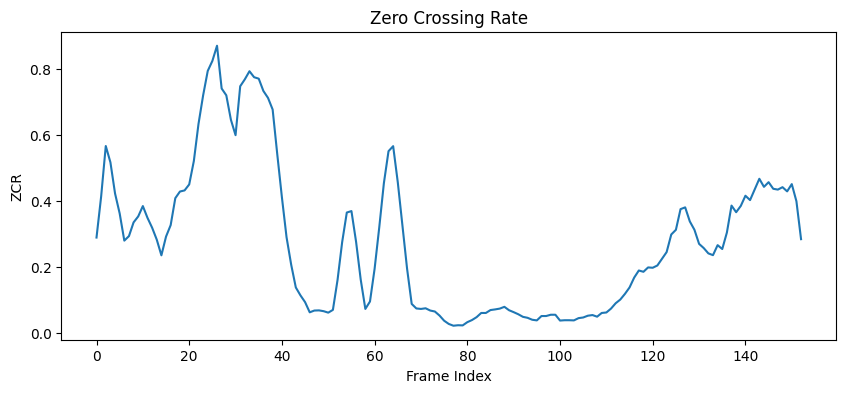

In [ ]:
# Compute the zero crossing rate
zcr = librosa.feature.zero_crossing_rate(y=y)

# Plot zero crossing rate
plt.figure(figsize=(10, 4))
plt.plot(zcr[0])
plt.title('Zero Crossing Rate')
plt.xlabel('Frame Index')
plt.ylabel('ZCR')
plt.show()

### wavelet Transform

In [ ]:
!pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 32.5 MB/s eta 0:00:00


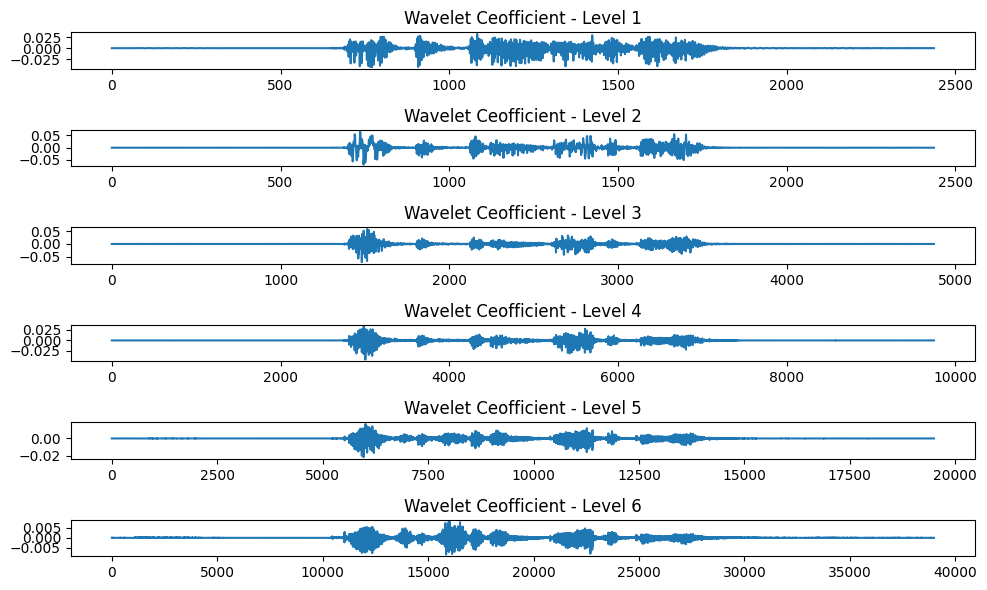

In [ ]:
import pywt
import numpy as np

# Perform wavelet transform (Discrete Wavelet Transform)
coeffs = pywt.wavedec(y, 'db1', level=5)

# Plot the wavelet transform coefficients
plt.figure(figsize=(10,6))
for i, coeff in enumerate(coeffs):
  plt.subplot(len(coeffs), 1, i+1)
  plt.plot(coeff)
  plt.title(f'Wavelet Ceofficient - Level {i+1}')
plt.tight_layout()
plt.show()

### Root Mean Square (RMS) Energy

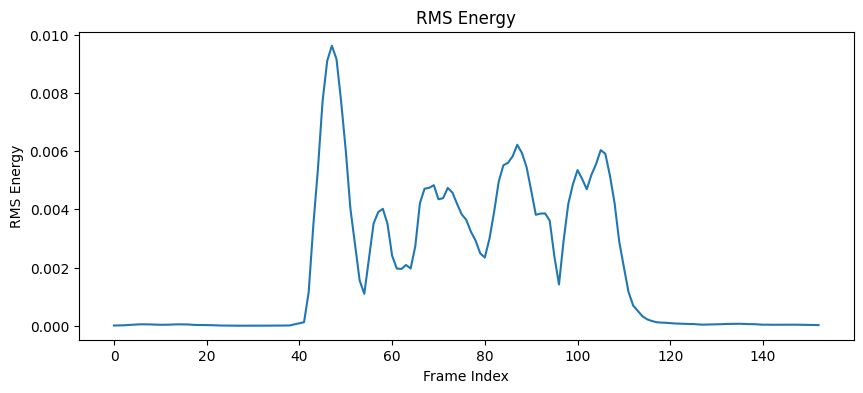

In [ ]:
# Compute the RMS energy
rms = librosa.feature.rms(y=y)

# Plot the RMS energy
plt.figure(figsize=(10,4))
plt.plot(rms[0])
plt.title('RMS Energy')
plt.xlabel('Frame Index')
plt.ylabel('RMS Energy')
plt.show()

### Zero-Crossing Rate

Text(0, 0.5, 'Amplitude')

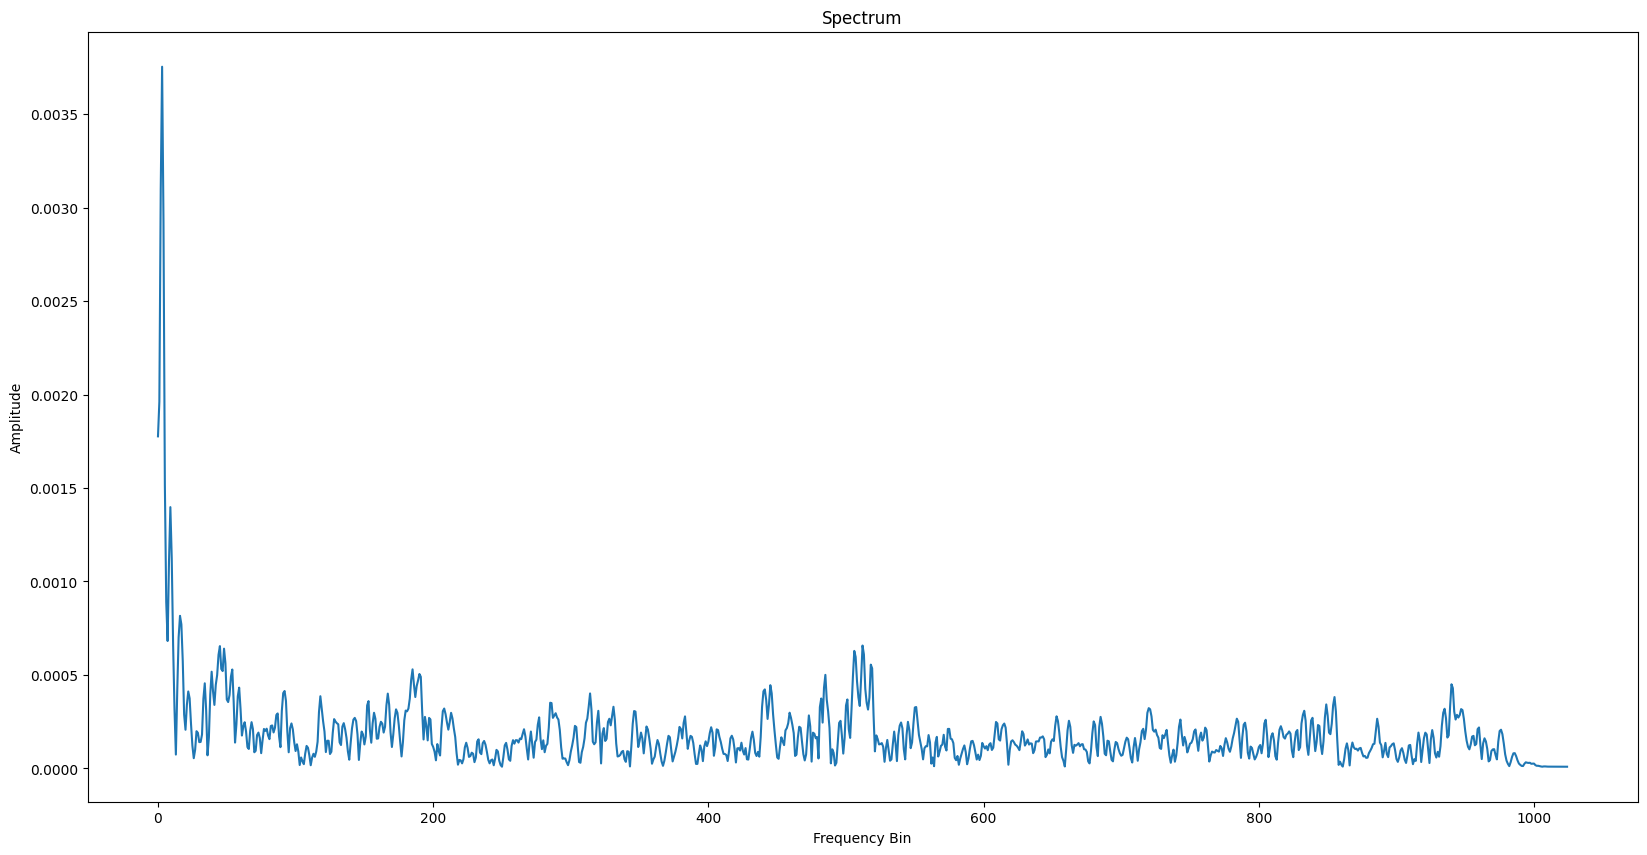

In [ ]:
n_fft = 2048
ft = np.abs(librosa.stft(y[:n_fft], hop_length=n_fft + 1))

plt.figure(figsize=(20,10))
plt.plot(ft)
plt.title("Spectrum")
plt.xlabel("Frequency Bin")
plt.ylabel("Amplitude")